# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import shutil
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAM_ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the testing data
test_path = r'C:\Users\RAM_ANURAG\Downloads\Movie_genere_Classification\test_data.txt\test_data.txt'

test_data = pd.read_csv(test_path, sep=':::', names=['Title', 'Description'], engine='python')

In [3]:
test_data

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
test_data.shape

(54200, 2)

In [5]:
test_data.isnull().sum()

Title          0
Description    0
dtype: int64

In [6]:
# Rename the column "Description" to "Text"
test_data = test_data.rename(columns={'Description': 'Text'})
test_data.head()

,Title,Text
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


## There is No Null value present in Testing data

In [7]:
# Load the training data
train_path = r'C:\Users\RAM_ANURAG\Downloads\Movie_genere_Classification\train_data.txt\train_data.txt'

train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [8]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [9]:
train_data.shape

(54214, 3)

In [10]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [11]:
# Rename the column "Description" to "Text"
train_data = train_data.rename(columns={'Description': 'Text'})
train_data.head()

,Title,Genre,Text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## There is No Null value present in Training data

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   54214 non-null  object
 1   Genre   54214 non-null  object
 2   Text    54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [13]:
print(" Unique value in Genre column :", train_data['Genre'].unique())
print(" No.Unique value in Genre column :", train_data['Genre'].nunique())


 Unique value in Genre column : [' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']
 No.Unique value in Genre column : 27


In [14]:
train_data['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

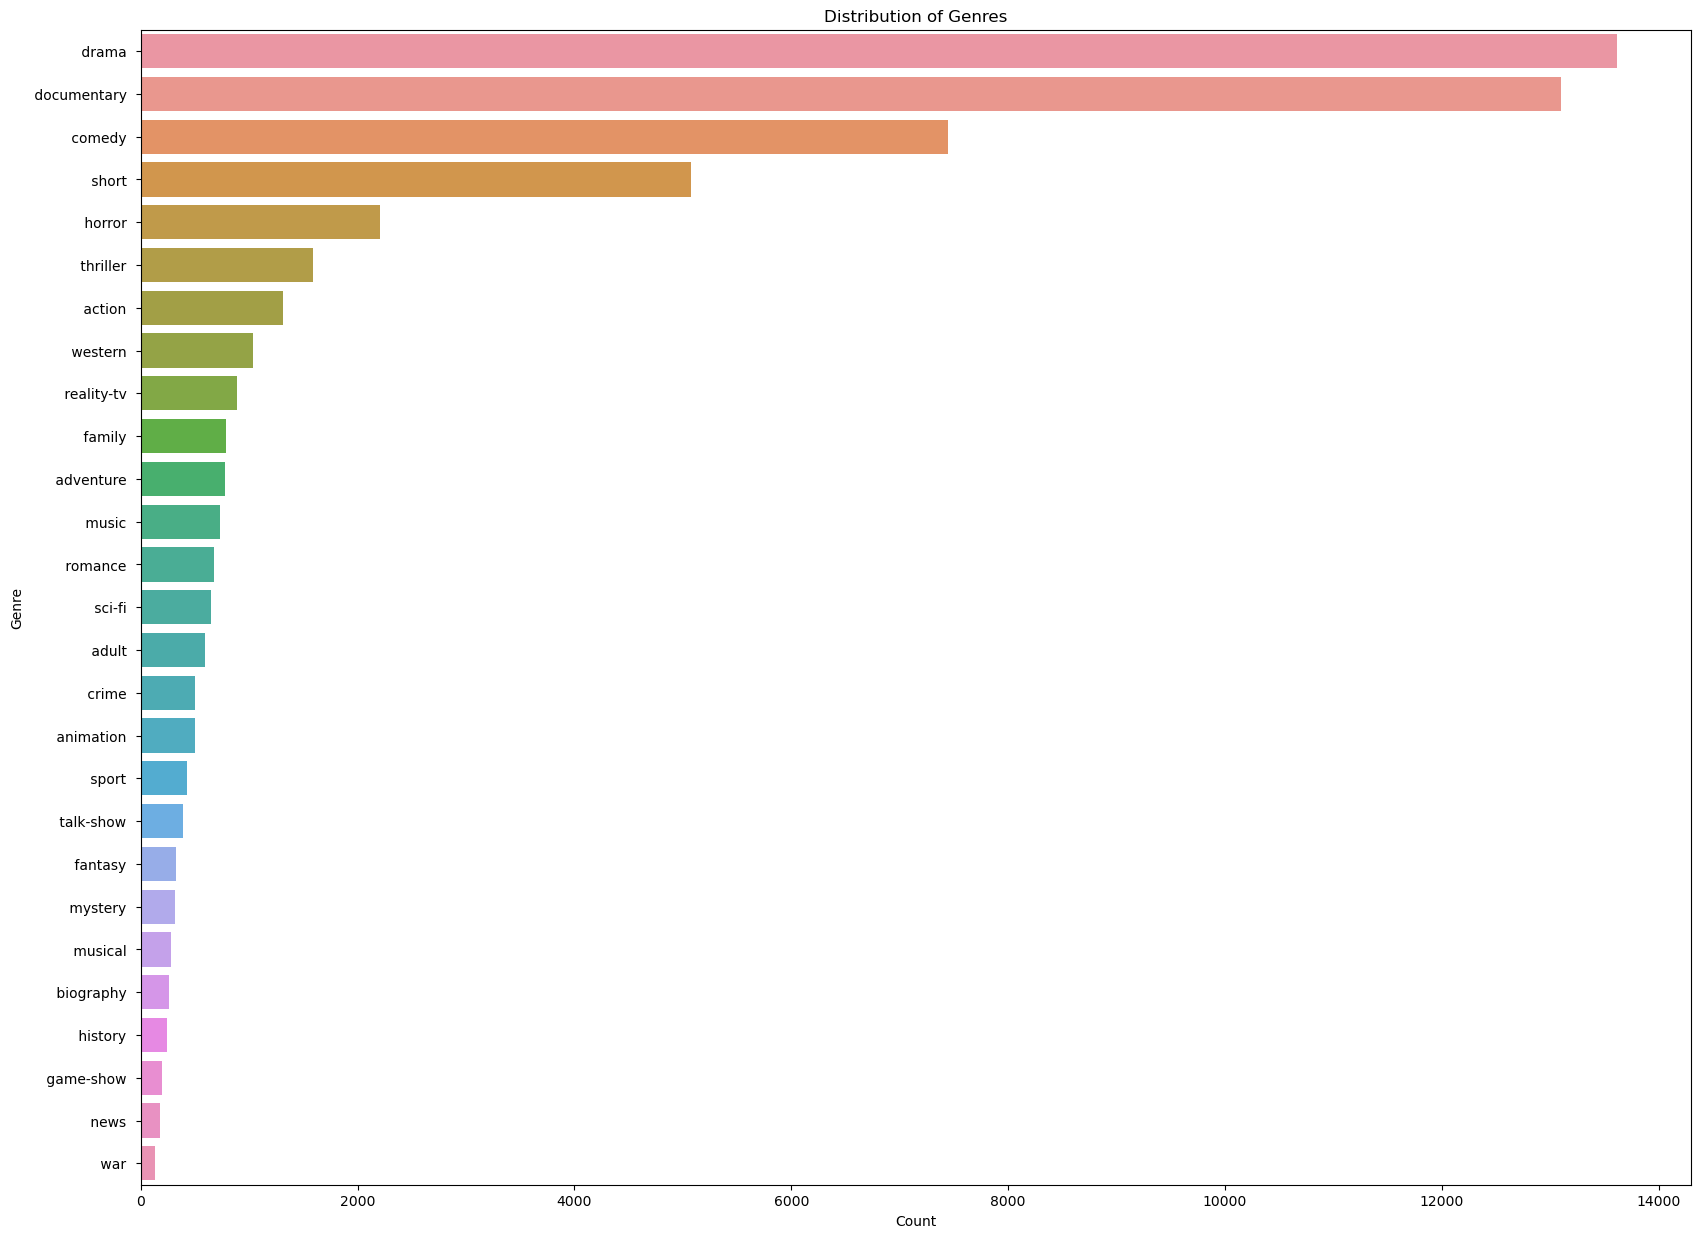

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count of each genre
plt.figure(figsize=(20, 15))
sns.countplot(y='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


###   The genres "drama" and "documentary" have the highest counts, indicating that they are the most common genres in the dataset.

# Text Preprocessing

In [16]:
# Initialize the Porter Stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    # Cleaning special characters, converting to lowercase, and tokenizing
    words = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    # Removing stopwords and stemming
    stemmed_words = [ps.stem(word) for word in words if word not in stop_words]
    # Joining the words back into a sentence
    cleaned_text = ' '.join(stemmed_words)
    return cleaned_text

In [17]:
# Apply the clean_text function to the 'Text' column of both train_data and test_data
train_data['Cleaned_Text'] = train_data['Text'].apply(clean_text)
test_data['Cleaned_Text'] = test_data['Text'].apply(clean_text)

In [18]:
train_data

,Title,Genre,Text,Cleaned_Text
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer un recov bodi ground zero also...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short live nbc live sitcom center bonino world...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next gener exploit sister kapa bay soror hous ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt stand comedi grow face fear fr...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live countri difficult time keep...


In [19]:
test_data

,Title,Text,Cleaned_Text
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apart job especi girlf...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughti child three belong w...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die spoken brother year seriou cancer d...
5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",cover multipl genr tale light dark antholog we...
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alic cora munro attempt find father british of...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movi year make oliv twist art dodger fagin lov...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysteri rock j mike mallard askew broa...


In [20]:
train_data['Text'][54211] # before text preprocessing

" The NEXT Generation of EXPLOITATION. The sisters of Kapa - Bay Sorority House are mysteriously vanishing. The girls have been abducted and locked up in a horse stable, forced into sexual slavery and depravity, which leads to a fight to their final breath. Electric ear devices are planted to prevent escape with electric shock therapy. The diabolical family is an incest ridden tribe of an obese woman that never stops eating and a midget with a voice box for parents. Their two sons are repulsive, drooling inbreds with speech problems and a scabbed head. The daughter is a beautiful, young woman that is covered in scars, mentally and physically. Dead Girls Don't Cry is an Exploitation/ Revenge film that combines much more into one and pushes the boundaries of today's Horror."

In [21]:
train_data['Cleaned_Text'][54211] # After preprocessing

'next gener exploit sister kapa bay soror hous mysteri vanish girl abduct lock hors stabl forc sexual slaveri deprav lead fight final breath electr ear devic plant prevent escap electr shock therapi diabol famili incest ridden tribe obes woman never stop eat midget voic box parent two son repuls drool inbr speech problem scab head daughter beauti young woman cover scar mental physic dead girl cri exploit reveng film combin much one push boundari today horror'

# Label Encoding

In [22]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data['Genre_Encoded'] = label_encoder.fit_transform(train_data['Genre'])

In [23]:
train_data.head()

,Title,Genre,Text,Cleaned_Text,Genre_Encoded
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...,8
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,24
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,1
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,8
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer un recov bodi ground zero also...,8


In [24]:
print(train_data.shape)

print(test_data.shape)

(54214, 5)
(54200, 3)


# TF-IDF

In [25]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit and transform the training data
train_tfidf = tfidf_vectorizer.fit_transform(train_data['Cleaned_Text'])

# Transform the test data using the same vectorizer
test_tfidf = tfidf_vectorizer.transform(test_data['Cleaned_Text'])


In [26]:
#train_tfidf= train_tfidf.toarray()
#train_tfidf

In [27]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(train_tfidf, train_data['Genre_Encoded'], test_size=0.2, random_state=42)

In [28]:
train_data['Genre_Encoded']

1         8
2        24
3         1
4         8
5         8
         ..
54210     5
54211    13
54212     7
54213     5
54214    12
Name: Genre_Encoded, Length: 54214, dtype: int32

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler with with_mean=False
scaler = StandardScaler(with_mean=False)

# Transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the validation set
X_val = scaler.transform(X_val)


# Multinomial Naive Bayes:

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Multinomial Naive Bayes
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train, y_train)
multinomial_nb_train_pred = multinomial_nb_model.predict(X_train)
multinomial_nb_val_pred = multinomial_nb_model.predict(X_val)
multinomial_nb_train_accuracy = accuracy_score(y_train, multinomial_nb_train_pred)
multinomial_nb_val_accuracy = accuracy_score(y_val, multinomial_nb_val_pred)


# Print the accuracies
print("Multinomial Naive Bayes:")
print("Training Accuracy:", multinomial_nb_train_accuracy)
print("validation Accuracy:", multinomial_nb_val_accuracy)

Multinomial Naive Bayes:
Training Accuracy: 0.7082151668165364
validation Accuracy: 0.4444341971779028


In [31]:
# Print classification report and confusion matrix
print("Multinomial Naive Bayes:")
print(classification_report(y_val, multinomial_nb_val_pred))
print(confusion_matrix(y_val, multinomial_nb_val_pred))


Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.29      0.35      0.32       263
           1       0.40      0.50      0.44       112
           2       0.16      0.18      0.17       139
           3       0.15      0.17      0.16       104
           4       0.02      0.03      0.03        61
           5       0.45      0.46      0.46      1443
           6       0.14      0.16      0.15       107
           7       0.69      0.60      0.64      2659
           8       0.56      0.44      0.49      2697
           9       0.17      0.22      0.19       150
          10       0.15      0.16      0.15        74
          11       0.59      0.60      0.59        40
          12       0.04      0.09      0.06        45
          13       0.48      0.52      0.50       431
          14       0.35      0.54      0.42       144
          15       0.06      0.08      0.07        50
          16       0.06      0.09      0.07        56
  

# Gaussian Naive Bayes:

In [32]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train.toarray(), y_train)  # Convert to array for GaussianNB
gaussian_nb_train_pred = gaussian_nb_model.predict(X_train.toarray())
gaussian_nb_val_pred = gaussian_nb_model.predict(X_val.toarray())
gaussian_nb_train_accuracy = accuracy_score(y_train, gaussian_nb_train_pred)
gaussian_nb_val_accuracy = accuracy_score(y_val, gaussian_nb_val_pred)

print("\nGaussian Naive Bayes:")
print("Training Accuracy:", gaussian_nb_train_accuracy)
print("validation Accuracy:", gaussian_nb_val_accuracy)


Gaussian Naive Bayes:
Training Accuracy: 0.4921721887897443
validation Accuracy: 0.21672968735589782


In [37]:
# Print classification report 
print("Gaussian Naive Bayes:")
print(classification_report(y_val, gaussian_nb_val_pred))


Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.08      0.13      0.10       263
           1       0.18      0.16      0.17       112
           2       0.04      0.05      0.04       139
           3       0.02      0.01      0.01       104
           4       0.03      0.02      0.02        61
           5       0.24      0.28      0.26      1443
           6       0.04      0.04      0.04       107
           7       0.52      0.30      0.38      2659
           8       0.38      0.14      0.21      2697
           9       0.08      0.12      0.10       150
          10       0.08      0.05      0.06        74
          11       0.75      0.07      0.14        40
          12       0.00      0.00      0.00        45
          13       0.13      0.21      0.16       431
          14       0.15      0.10      0.12       144
          15       0.00      0.00      0.00        50
          16       0.04      0.05      0.05        56
     

# Bernoulli Naive Bayes:


In [40]:
from sklearn.naive_bayes import BernoulliNB

# Bernoulli Naive Bayes
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(X_train, y_train)
bernoulli_nb_train_pred = bernoulli_nb_model.predict(X_train)
bernoulli_nb_val_pred = bernoulli_nb_model.predict(X_val)
bernoulli_nb_train_accuracy = accuracy_score(y_train, bernoulli_nb_train_pred)
bernoulli_nb_val_accuracy = accuracy_score(y_val, bernoulli_nb_val_pred)

print("\nBernoulli Naive Bayes:")
print("Training Accuracy:", bernoulli_nb_train_accuracy)
print("validation Accuracy:", bernoulli_nb_val_accuracy)


Bernoulli Naive Bayes:
Training Accuracy: 0.6252103940421019
validation Accuracy: 0.536567370653878


In [41]:
# Print classification report 
print("Bernoulli Naive Bayes:")
print(classification_report(y_val, bernoulli_nb_val_pred))


Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.37      0.43      0.40       263
           1       0.68      0.37      0.48       112
           2       0.34      0.21      0.26       139
           3       0.39      0.07      0.11       104
           4       0.00      0.00      0.00        61
           5       0.47      0.62      0.53      1443
           6       0.00      0.00      0.00       107
           7       0.72      0.69      0.71      2659
           8       0.62      0.59      0.60      2697
           9       0.35      0.13      0.19       150
          10       0.18      0.03      0.05        74
          11       1.00      0.15      0.26        40
          12       0.06      0.02      0.03        45
          13       0.61      0.71      0.65       431
          14       0.40      0.60      0.48       144
          15       0.25      0.04      0.07        50
          16       0.11      0.09      0.10        56
    

# Logistic Regression:

In [43]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_train_pred = logistic_model.predict(X_train)
logistic_val_pred = logistic_model.predict(X_val)
logistic_train_accuracy = accuracy_score(y_train, logistic_train_pred)
logistic_val_accuracy = accuracy_score(y_val, logistic_val_pred)


# Print the accuracies
print("Logistic Regression:")
print("Training Accuracy:", logistic_train_accuracy)
print("Validation Accuracy:", logistic_val_accuracy)

Logistic Regression:
Training Accuracy: 0.9996310898987802
Validation Accuracy: 0.4743152264133542


C:\Users\RAM_ANURAG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Print classification report 
print("Logistic Regression:")
print(classification_report(y_val, logistic_val_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.37      0.29      0.32       263
           1       0.63      0.42      0.50       112
           2       0.22      0.21      0.21       139
           3       0.17      0.09      0.11       104
           4       0.03      0.02      0.02        61
           5       0.41      0.49      0.45      1443
           6       0.16      0.09      0.12       107
           7       0.64      0.65      0.65      2659
           8       0.50      0.56      0.53      2697
           9       0.24      0.17      0.20       150
          10       0.04      0.01      0.02        74
          11       0.86      0.47      0.61        40
          12       0.06      0.02      0.03        45
          13       0.58      0.51      0.54       431
          14       0.49      0.44      0.47       144
          15       0.14      0.06      0.08        50
          16       0.14      0.05      0.08        56
      

##  Prediction on test data

In [46]:

# Make predictions on the test data
test_predictions = bernoulli_nb_model.predict(test_tfidf)

# Add predicted genres to the test data DataFrame
test_data['Predicted_Genre'] = test_predictions

# Save the test data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)
test_data


,Title,Text,Cleaned_Text,Predicted_Genre
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apart job especi girlf...,8
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughti child three belong w...,8
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...,7
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die spoken brother year seriou cancer d...,8
5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...,8
...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",cover multipl genr tale light dark antholog we...,8
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alic cora munro attempt find father british of...,8
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movi year make oliv twist art dodger fagin lov...,5
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysteri rock j mike mallard askew broa...,5
